# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress


# Impor the OpenWeatherMap API key
from dotenv import load_dotenv
import os
load_dotenv()
api_key = os.getenv("OPEN_WEATHERMAP_API_KEY")

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 580


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID="


# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")


# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + api_key + "&q=" + city

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

    # pause to avoid rate limiting
    # time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | saurimo
Processing Record 2 of Set 1 | bredasdorp
Processing Record 3 of Set 1 | chibougamau
Processing Record 4 of Set 1 | duba
Processing Record 5 of Set 1 | swakopmund
Processing Record 6 of Set 1 | galveston
Processing Record 7 of Set 1 | yellowknife
Processing Record 8 of Set 1 | pisco
Processing Record 9 of Set 1 | zhosaly
Processing Record 10 of Set 1 | petropavlovsk-kamchatsky
Processing Record 11 of Set 1 | port-aux-francais
Processing Record 12 of Set 1 | margaret river
Processing Record 13 of Set 1 | tingo maria
Processing Record 14 of Set 1 | adamstown
Processing Record 15 of Set 1 | bethel
Processing Record 16 of Set 1 | grytviken
Processing Record 17 of Set 1 | edinburgh of the seven seas
Processing Record 18 of Set 1 | mugia
Processing Record 19 of Set 1 | hermanus
Processing Record 20 of Set 1 | beruniy
Processing Record 21 of Set 1 | tranovaho
City not found. Skipping...
Processi

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()


City          557
Lat           557
Lng           557
Max Temp      557
Humidity      557
Cloudiness    557
Wind Speed    557
Country       557
Date          557
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,saurimo,-9.6608,20.3916,23.91,19,9,1.78,AO,1722879413
1,bredasdorp,-34.5322,20.0403,8.98,83,11,2.91,ZA,1722879413
2,chibougamau,49.9168,-74.3659,17.79,45,75,6.17,CA,1722879413
3,duba,27.3513,35.6901,32.70,52,0,2.63,SA,1722879413
4,swakopmund,-22.6833,14.5333,13.88,79,24,2.24,NA,1722879413


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,saurimo,-9.6608,20.3916,23.91,19,9,1.78,AO,1722879413
1,bredasdorp,-34.5322,20.0403,8.98,83,11,2.91,ZA,1722879413
2,chibougamau,49.9168,-74.3659,17.79,45,75,6.17,CA,1722879413
3,duba,27.3513,35.6901,32.70,52,0,2.63,SA,1722879413
4,swakopmund,-22.6833,14.5333,13.88,79,24,2.24,NaN,1722879413


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

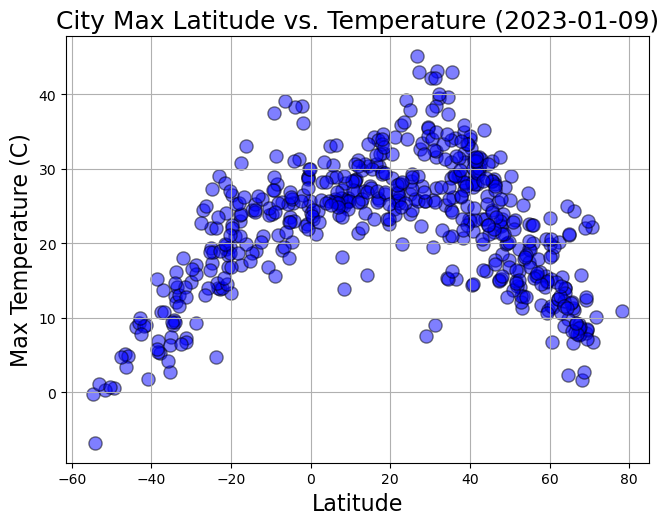

In [8]:
# Build scatter plot for latitude vs. temperature
# Plot main data
xPlot = city_data_df["Lat"]
yPlot = city_data_df["Max Temp"]
plt.scatter(xPlot, yPlot, 90, marker="o", facecolors="blue", edgecolors='black', alpha=0.5)
plt.tight_layout()
plt.grid(True)

# Incorporate the other graph properties
plt.xlabel("Latitude", fontsize=16)
plt.ylabel("Max Temperature (C)", fontsize=16)
plt.title("City Max Latitude vs. Temperature (2023-01-09)", fontsize=18)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

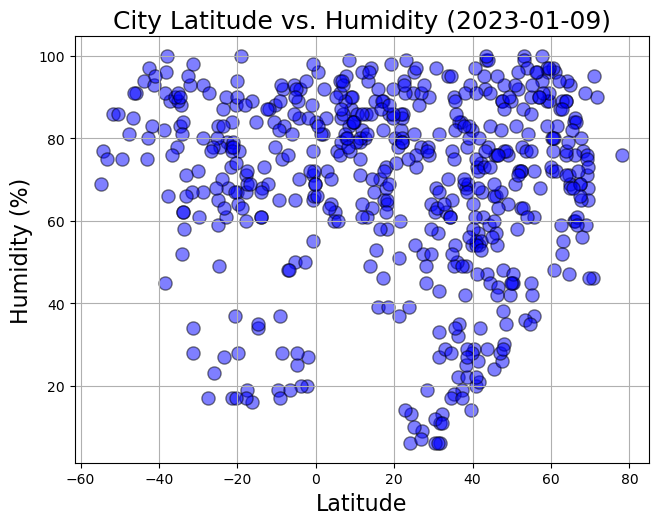

In [10]:
# Build the scatter plots for latitude vs. humidity
# plot main data
xPlot = city_data_df["Lat"]
yPlot = city_data_df["Humidity"]
plt.scatter(xPlot, yPlot, 90, marker="o", facecolors="blue", edgecolors='black', alpha=0.5)
plt.tight_layout()
plt.grid(True)

# Incorporate the other graph properties
plt.xlabel("Latitude", fontsize=16)
plt.ylabel("Humidity (%)", fontsize=16)
plt.title("City Latitude vs. Humidity (2023-01-09)", fontsize=18)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

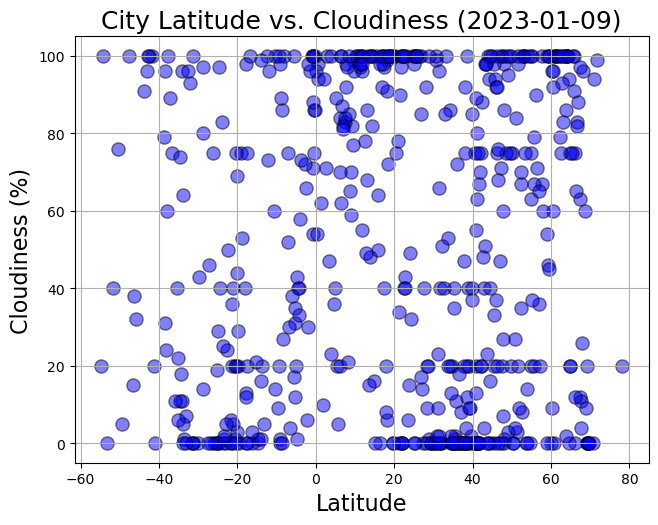

In [11]:
# Build the scatter plots for latitude vs. cloudiness
# Plot main data
xPlot = city_data_df["Lat"]
yPlot = city_data_df["Cloudiness"]
plt.scatter(xPlot, yPlot, 90, marker="o", facecolors="blue", edgecolors='black', alpha=0.5)
plt.tight_layout()
plt.grid(True)
# Plot output and styling
# Incorporate the other graph properties
plt.xlabel("Latitude", fontsize=16)
plt.ylabel("Cloudiness (%)", fontsize=16)
plt.title("City Latitude vs. Cloudiness (2023-01-09)", fontsize=18)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

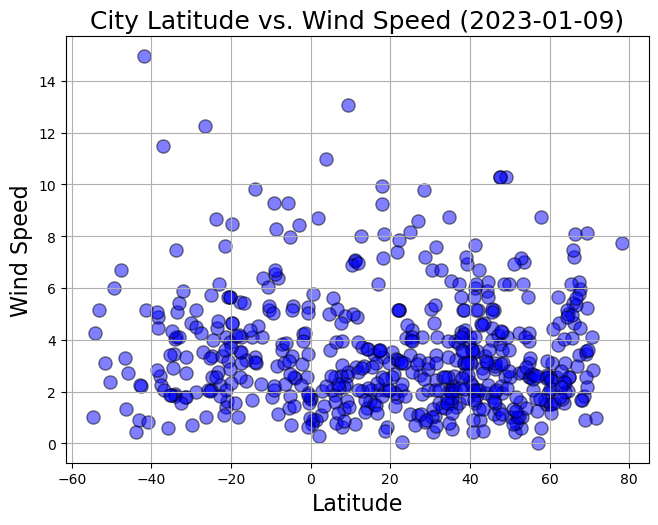

In [12]:
# Build the scatter plots for latitude vs. wind speed
# Plot main data
xPlot = city_data_df["Lat"]
yPlot = city_data_df["Wind Speed"]
plt.scatter(xPlot, yPlot, 90, marker="o", facecolors="blue", edgecolors='black', alpha=0.5)
plt.tight_layout()
plt.grid(True)

# Plot output and styling
# Incorporate the other graph properties
plt.xlabel("Latitude", fontsize=16)
plt.ylabel("Wind Speed", fontsize=16)
plt.title("City Latitude vs. Wind Speed (2023-01-09)", fontsize=18)

# Save the figure
plt.savefig("output_data/Fig4.png",dpi=300, bbox_inches = "tight")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [13]:
# Define a function to create Linear Regression plots
def linearRegression(x_values,y_values, regEQplotX, regEQplotY, ylabel):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_values,y_values, 90, marker="o", facecolors="blue", alpha=0.5)
    plt.plot(x_values,regress_values,"r-", linewidth=3)
    plt.grid(True)
    print(f'The r-value is {rvalue}')
    plt.annotate(line_eq,(regEQplotX,regEQplotY),fontsize=18,color="red")
    plt.xlabel('Latitude', fontsize=16)
    plt.ylabel(f'{ylabel}', fontsize=16)
    plt.grid() 

In [14]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[pd.to_numeric(city_data_df["Lat"]).astype(float)>= 0, :]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,chibougamau,49.9168,-74.3659,17.79,45,75,6.17,CA,1722879413
3,duba,27.3513,35.6901,32.70,52,0,2.63,SA,1722879413
5,galveston,29.3669,-94.9669,35.61,64,0,2.88,US,1722879413
6,yellowknife,62.4560,-114.3525,20.23,59,75,4.63,CA,1722879413
8,zhosaly,45.4878,64.0781,31.03,24,33,3.99,KZ,1722879413


In [15]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[pd.to_numeric(city_data_df["Lat"]).astype(float)< 0, :]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,saurimo,-9.6608,20.3916,23.91,19,9,1.78,AO,1722879413
1,bredasdorp,-34.5322,20.0403,8.98,83,11,2.91,ZA,1722879413
4,swakopmund,-22.6833,14.5333,13.88,79,24,2.24,NaN,1722879413
7,pisco,-13.7000,-76.2167,19.03,68,20,3.09,PE,1722879413
10,port-aux-francais,-49.3500,70.2167,0.62,75,5,6.02,TF,1722879413


###  Temperature vs. Latitude Linear Regression Plot

The r-value is -0.5979802774138564


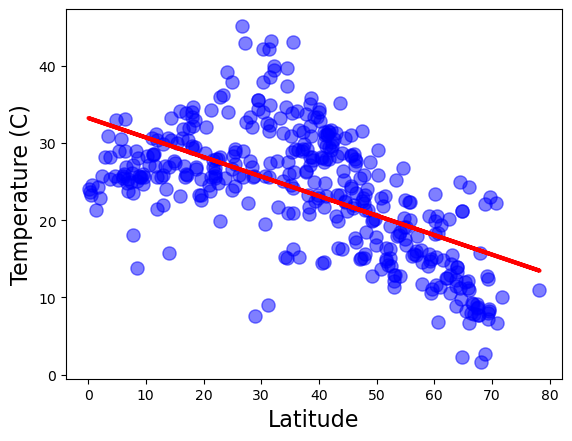

In [16]:
# Linear regression on Northern Hemisphere
x_plot = northern_hemi_df["Lat"]
y_plot = northern_hemi_df["Max Temp"]
linearRegression(x_plot, y_plot, 5, -20, "Temperature (C)")
plt.savefig("output_data/Fig5.png",dpi=300, bbox_inches = "tight")

The r-value is 0.8451563638011366


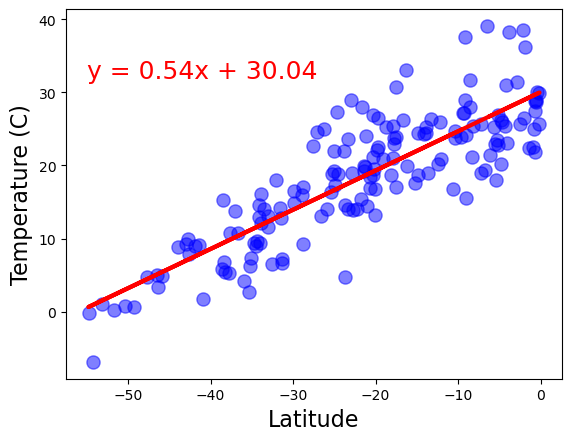

In [17]:
# Linear regression on Southern Hemisphere
x_plot = southern_hemi_df["Lat"]
y_plot = southern_hemi_df["Max Temp"]
linearRegression(x_plot, y_plot, -55, 32, "Temperature (C)")
plt.savefig("output_data/Fig6.png",dpi=300, bbox_inches = "tight")

**Discussion about the linear relationship:** YOUR RESPONSE HERE



The linear regression lines for both hemispheres highlight the expected inverse relationship between temperature and distance from the equator. The formula for the Southern Hemisphere is
y=0.54x+30.04, indicating a significant correlation between latitude and temperature.

### Humidity vs. Latitude Linear Regression Plot

The r-value is -0.03512303671977914


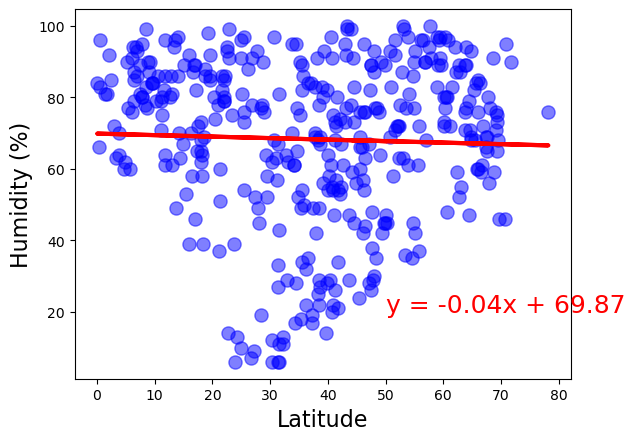

In [18]:
# Northern Hemisphere
x_plot = northern_hemi_df["Lat"]
y_plot = northern_hemi_df["Humidity"]
linearRegression(x_plot, y_plot, 50, 20, "Humidity (%)")
plt.savefig("output_data/Fig7.png",dpi=300, bbox_inches = "tight")

The r-value is -0.2403003628482802


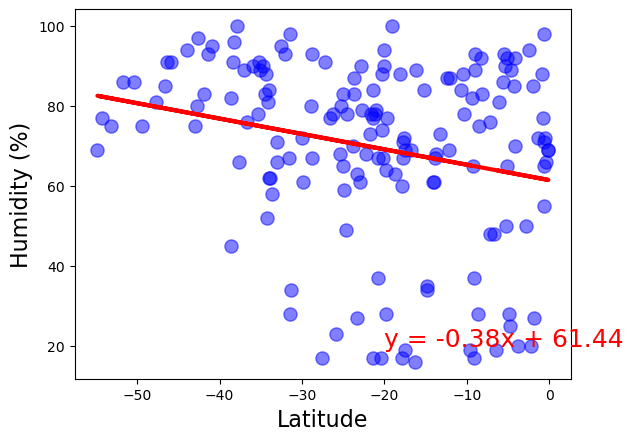

In [19]:
# Southern Hemisphere
x_plot = southern_hemi_df["Lat"]
y_plot = southern_hemi_df["Humidity"]
linearRegression(x_plot, y_plot, -20, 20, "Humidity (%)")
plt.savefig("output_data/Fig8.png",dpi=300, bbox_inches = "tight")

**Discussion about the linear relationship:** YOUR RESPONSE HERE

The Northern Hemispher shows a mimimal decrease in humidity with increasing latitude,while the Southern Hemisphere shows a signifcant decrease, suggesting differing climatic and geographical influences on humidity distrubution.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is -0.12212359760277786


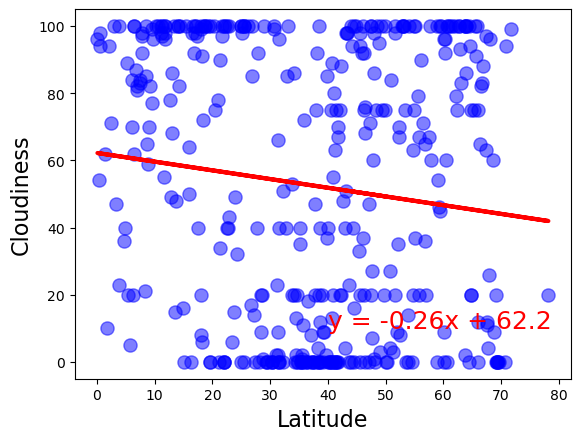

In [20]:
# Northern Hemisphere
x_plot = northern_hemi_df["Lat"]
y_plot = northern_hemi_df["Cloudiness"]
linearRegression(x_plot, y_plot, 40, 10, "Cloudiness")
plt.savefig("output_data/Fig9.png",dpi=300, bbox_inches = "tight")

The r-value is 0.08406963122336533


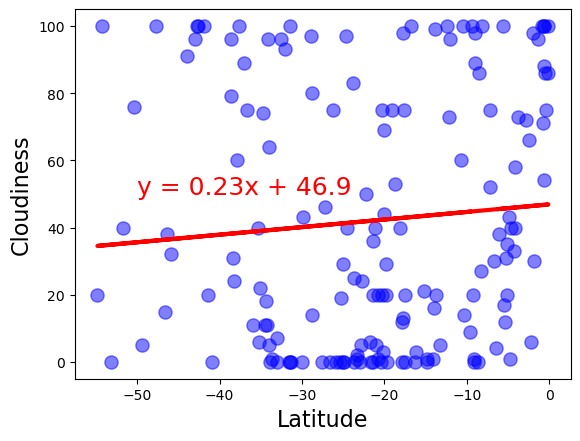

In [21]:
# Southern Hemisphere
x_plot = southern_hemi_df["Lat"]
y_plot = southern_hemi_df["Cloudiness"]
linearRegression(x_plot, y_plot, -50, 50, "Cloudiness")
plt.savefig("output_data/Fig10.png",dpi=300, bbox_inches = "tight")

**Discussion about the linear relationship:** YOUR RESPONSE HERE

The linear relationships between cloudiness and latitude in both hemispheres are weak, indicating that latitude alone does not strongly determine cloudiness. The trends, while minor, show differing behaviors in the Northern and Southern Hemispheres, likely due to complex climatic interactions unique to each hemisphere.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is 0.028255356507679373


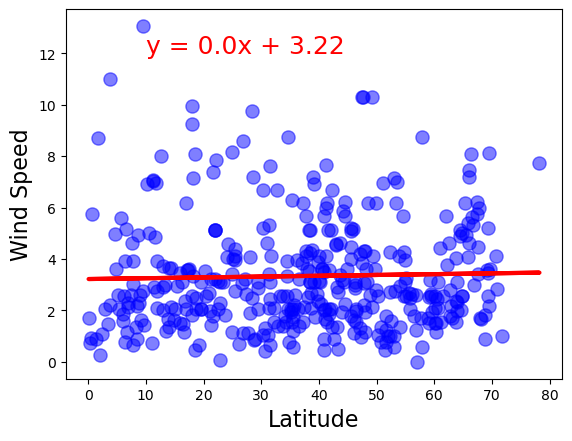

In [22]:
# Northern Hemisphere
x_plot = northern_hemi_df["Lat"]
y_plot = northern_hemi_df["Wind Speed"]
linearRegression(x_plot, y_plot, 10, 12, "Wind Speed")
plt.savefig("output_data/Fig11.png",dpi=300, bbox_inches = "tight")

The r-value is 0.011081691064460482


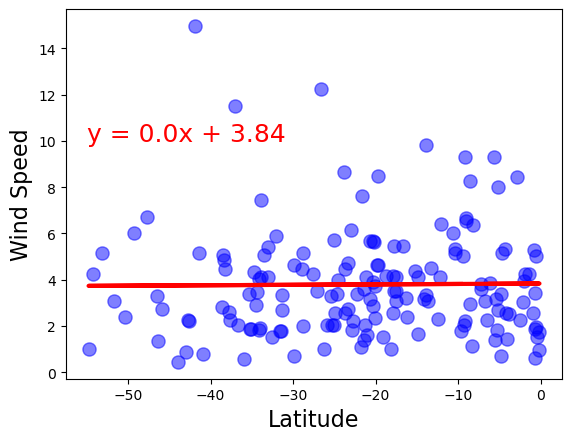

In [23]:
# Southern Hemisphere
x_plot = southern_hemi_df["Lat"]
y_plot = southern_hemi_df["Wind Speed"]
linearRegression(x_plot, y_plot, -55, 10, "Wind Speed")
plt.savefig("output_data/Fig12.png",dpi=300, bbox_inches = "tight")

**Discussion about the linear relationship:** YOUR RESPONSE HERE

Both equations suggest that there is no significant linear relationship between wind speed and latitude, as the slope ((0.0)) indicates no change in wind speed with latitude. 